<a href="https://colab.research.google.com/github/Mal-Lem/Segmentation-Clients/blob/main/Projet1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Segmentation des Clients**

# 1) Busniss undrestanding


 L'entreprise souhaite mieux comprendre ses clients afin de mieux les cibler avec des offres et des stratégies marketing adaptées. L'objectif principal est de segmenter les clients en groupes ayant des comportements similaires.

**Objectifs commerciaux :**

  * Optimisation des campagnes marketing : Personnaliser les campagnes en fonction des segments de clients pour augmenter le taux de conversion.

  * Amélioration de la fidélité : Adapter les stratégies de fidélisation en fonction des segments, en proposant des produits ou services qui correspondent aux besoins spécifiques de chaque groupe.

  * Maximisation des revenus : Identifier les segments les plus rentables et les cibler spécifiquement avec des promotions.

ensemble de données utilisé: https://www.kaggle.com/datasets/shwetabh123/mall-customers

# 2) Data understanding

In [210]:
import warnings
warnings.filterwarnings("ignore")

In [211]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import seaborn as sns

url = "/content/Mall_Customers.csv"
data = pd.read_csv(url)
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [212]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [213]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [214]:
data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [215]:
df = pd.DataFrame(data)
# transformer les colonnes non numérique
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [216]:
df = df.drop('CustomerID', axis=1)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


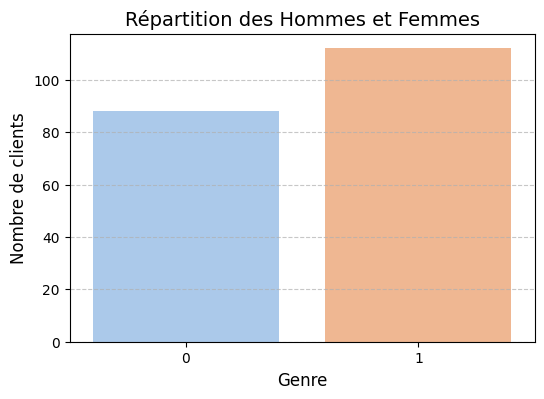

In [217]:
gender_counts = df["Gender"].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="pastel")

plt.title("Répartition des Hommes et Femmes", fontsize=14)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Nombre de clients", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


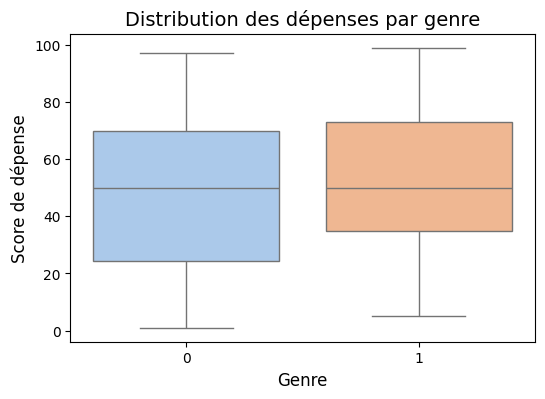

In [218]:
plt.figure(figsize=(6, 4))
sns.boxplot(x="Gender", y="Spending Score (1-100)", data=df, palette="pastel")

plt.title("Distribution des dépenses par genre", fontsize=14)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Score de dépense", fontsize=12)

plt.show()


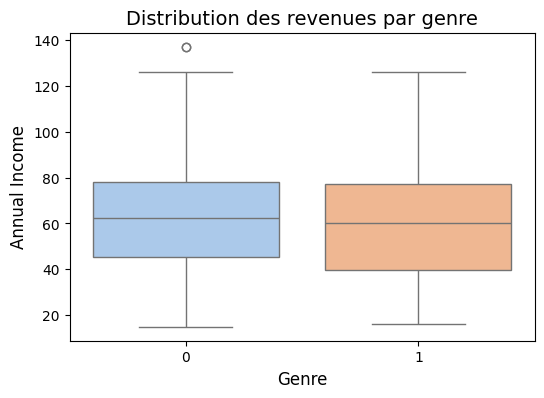

In [219]:
plt.figure(figsize=(6, 4))
sns.boxplot(x="Gender", y="Annual Income (k$)", data=df, palette="pastel")

plt.title("Distribution des revenues par genre", fontsize=14)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Annual Income", fontsize=12)

plt.show()

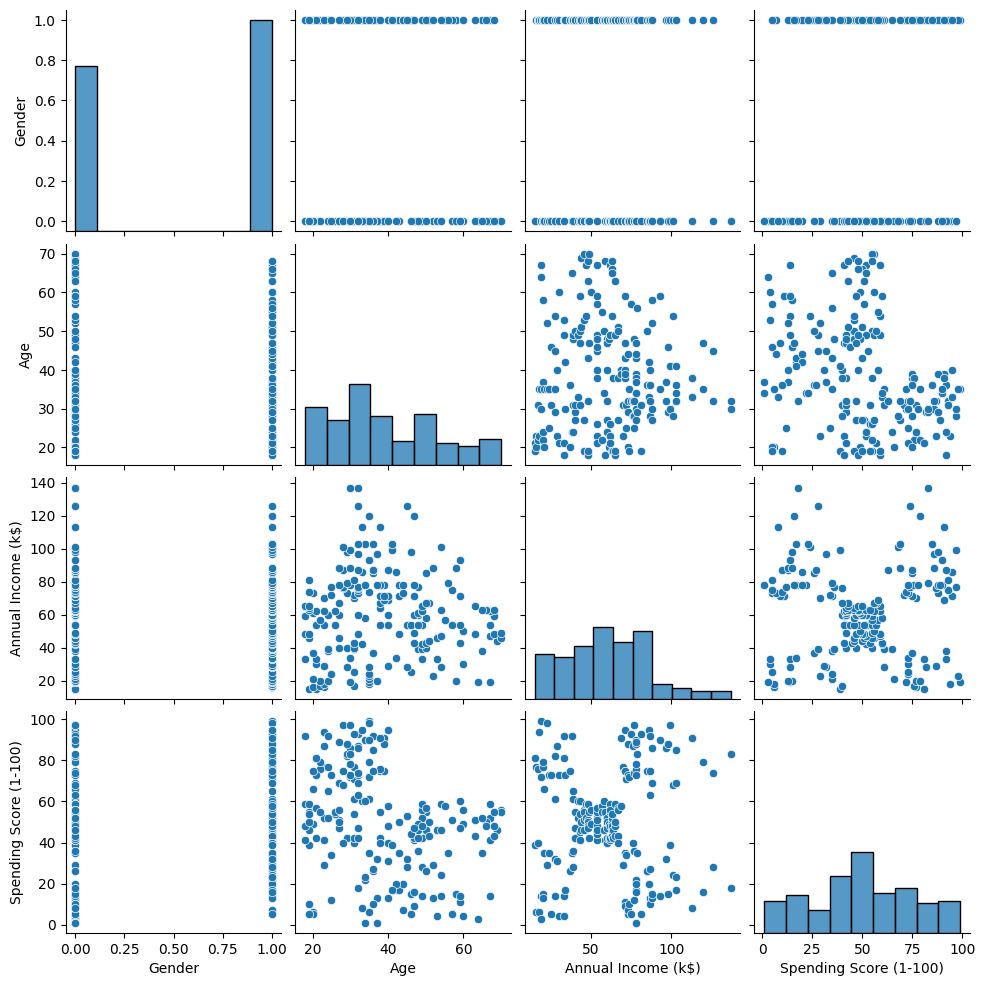

In [220]:
sns.pairplot(data=df)

**Corrélations linéaires :**

  Si deux variables sont fortement corrélées, les points s’aligneront assez bien le long d’une droite).

  Si les points sont dispersés sans forme particulière, cela suggère qu'il n'y a pas de corrélation linéaire forte entre les deux variables.

**Corrélations non linéaires :**

  Si la relation entre deux variables forme une courbe ou une autre forme géométrique, cela suggère une corrélation non linéaire. Par exemple, un pairplot peut montrer une relation quadratique (forme parabolique)

**Distributions individuelles :**

  Les histogrammes permettent d'observer la répartition de chaque variable. Cela peut vous aider à voir si les variables sont symétriques, biaisées, uniformes, ou suivent une distribution particulière (comme normale, exponentielle, etc.).


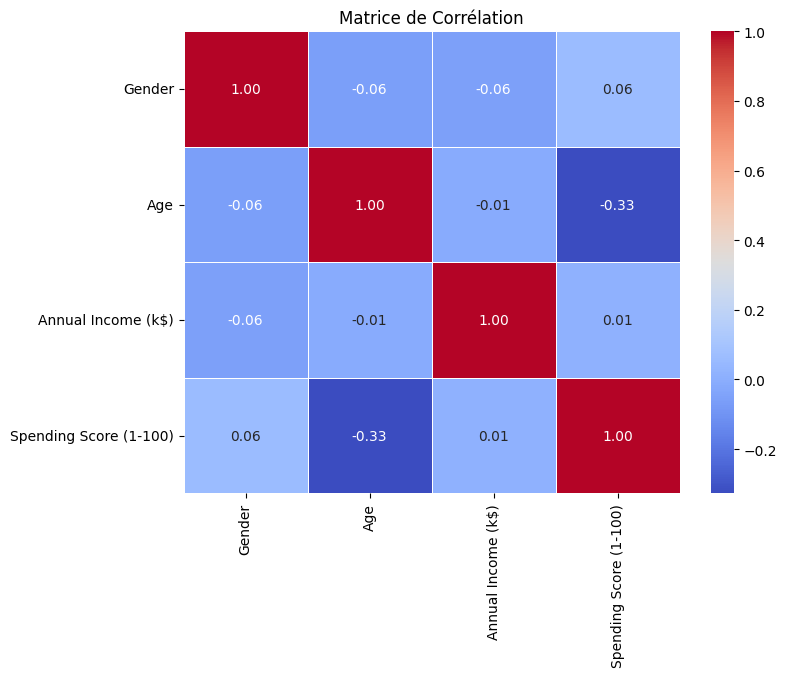

In [221]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matrice de Corrélation")
plt.show()


# 3) Data Preparation

In [222]:
df = df.drop('Gender', axis=1)
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [223]:
X = df.drop('Age', axis=1)
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


**Standardisation des données pour K-Means**
c'est l'une des conditions nécessaire à avoir pour appliquer l K-means pour centrer (moyenne = 0) et réduire (écart-type = 1)

StandardScaler : z = ( X − μ) / σ

In [224]:
moyenne = X.mean(axis=0)
ecart_type = X.std(axis=0)

print("moyenne avant standardisation :")
print(moyenne)

print("\nécart type avant standardisation :")
print(ecart_type)

moyenne avant standardisation :
Annual Income (k$)        60.56
Spending Score (1-100)    50.20
dtype: float64

écart type avant standardisation :
Annual Income (k$)        26.264721
Spending Score (1-100)    25.823522
dtype: float64


In [225]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(pd.DataFrame(X_scaled, columns=X.columns).head())

   Annual Income (k$)  Spending Score (1-100)
0           -1.738999               -0.434801
1           -1.738999                1.195704
2           -1.700830               -1.715913
3           -1.700830                1.040418
4           -1.662660               -0.395980


toutes les valeurs sont autours de 0 parfait!!

In [226]:
moyenne_scaled = X_scaled.mean(axis=0)
ecart_type_scaled = X_scaled.std(axis=0)

print("\nmoyenne après standardisation :")
print(moyenne_scaled)

print("\nécart type après standardisation :")
print(ecart_type_scaled)


moyenne après standardisation :
[-2.13162821e-16 -1.46549439e-16]

écart type après standardisation :
[1. 1.]


**Trouver le bon nombre de clusters avec la methode de coude (elbow methode)** :    
 basée sur la recherche du point où l'ajout de nouveaux clusters ne permet plus d'améliorer significativement la qualité du clustering

In [227]:
inertie = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=400, random_state=22)
    kmeans.fit(X_scaled)
    inertie.append(kmeans.inertia_)

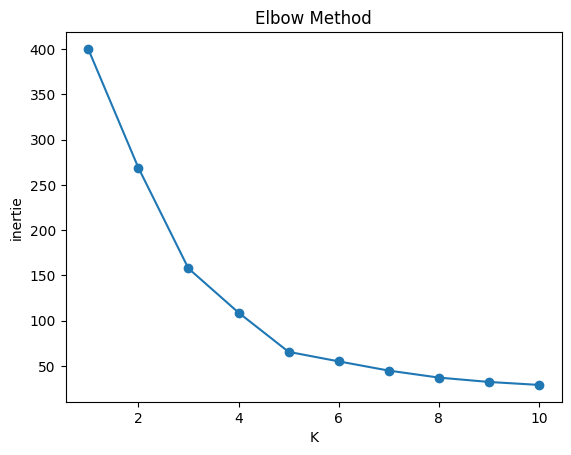

In [228]:
plt.plot(range(1, 11), inertie, marker='o')
plt.xlabel('K')
plt.ylabel('inertie')
plt.title('Elbow Method')
plt.show()

On choisit le k où l'inertie commence à diminuer lentement

**Validation du choix de k avec le Silhouette Score**

In [229]:
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

silhouette_avg = silhouette_score(X_scaled, labels)
print(f"Silhouette Score pour k={n_clusters} : {silhouette_avg:.2f}")


Silhouette Score pour k=5 : 0.55


* Si le score est proche de 1 ➝ les clusters sont bien séparés et cohérents.
* Si le score est bas (< 0.5) ➝ les clusters se mélangent et k doit être ajusté

# 4) Modeling

In [230]:
kmeans = KMeans(n_clusters=5, n_init=400, random_state=22)
kmeans.fit(X_scaled)

# entrainer puis predir
clusters = kmeans.labels_
centroids_scaled = kmeans.cluster_centers_

centroids = scaler.inverse_transform(centroids_scaled)

# creation cluster
df['Clusters'] = clusters


In [231]:
nom_segments = {
    0: 'Clients fidèles mais modestes',
    1: 'Consommateurs réguliers',
    2: 'Clients économes',
    3: 'Clients dormants',
    4: 'Clients premium'
}
# créer une colonne 'Segment' avec les noms significatifs
df['Segment'] = df['Clusters'].map(nom_segments)

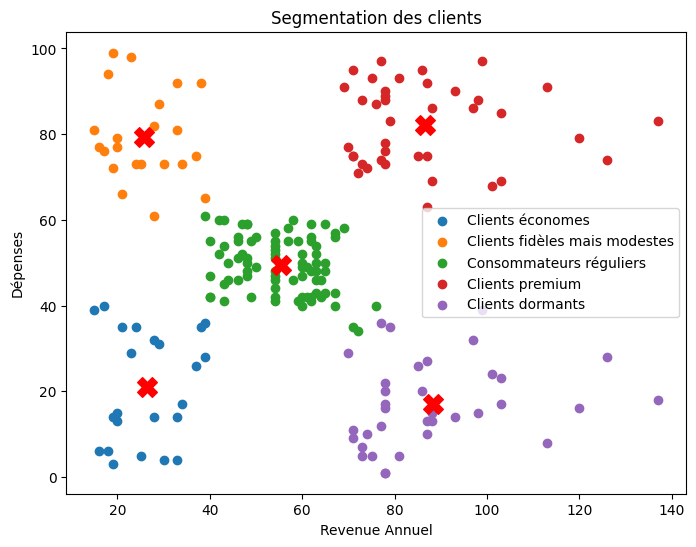

In [232]:
plt.figure(figsize=(8, 6))

for nom_segment in df['Segment'].unique():
    cluster_data = df[df['Segment'] == nom_segment]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], label=nom_segment)

for i, center in enumerate(centroids):
    plt.scatter(center[0], center[1], c='red', s=200, marker='X')

plt.xlabel('Revenue Annuel')
plt.ylabel('Dépenses')
plt.title('Segmentation des clients')
plt.legend()
plt.show()

# 5) Evaluation

In [233]:
new_data = pd.DataFrame({
    'Annual Income (k$)': [60, 70, 80],
    'Spending Score (1-100)': [10, 55, 80]
})

# standardiser les nouvelles données avec le même scaler
new_data_scaled = scaler.transform(new_data)

# prédire les clusters pour les nouvelles données
new_clusters = kmeans.predict(new_data_scaled)

#sil_score = silhouette_score(X_scaled, kmeans.labels_)
#print("Silhouette Score:", sil_score)

new_data['Predicted Cluster'] = new_clusters
print(new_data)


   Annual Income (k$)  Spending Score (1-100)  Predicted Cluster
0                  60                      10                  3
1                  70                      55                  1
2                  80                      80                  4


# 6) Deployment

In [234]:
code = '''
import streamlit as st
import pandas as pd
import pickle
from sklearn.preprocessing import StandardScaler
import os

model = pickle.load(open("model.pkl", "rb"))
scaler = pickle.load(open("scaler.pkl", "rb"))

st.title("🎯 Segmentation des Clients")

uploaded_file = st.file_uploader("importer un fichier CSV avec les colonnes RFM (+ tenure)", type=["csv"])

if uploaded_file is not None:
    data = pd.read_csv(uploaded_file)
    st.info("fichier importé avec succès")
else:
    if os.path.exists("Mall_Customers.csv"):
        data = pd.read_csv("Mall_Customers.csv")
        st.warning("aucun fichier importé. Utilisation du dataset par défaut : mall_customer.csv")
    else:
        st.error("aucun fichier importé et 'mall_customer.csv' introuvable.")
        st.stop()

st.subheader("Aperçu des données")
st.write(data.head())

scaled_data = scaler.transform(data)
clusters = model.predict(scaled_data)

data['Cluster'] = clusters

noms_clusters = {
    0: 'Clients fidèles mais modestes',
    1: 'Consommateurs réguliers',
    2: 'Clients économes',
    3: 'Clients dormants',
    4: 'Clients premium'
}

data['Segment'] = data['Cluster'].map(noms_clusters)

st.subheader("résultat de la segmentation")
st.write(data)
'''

with open("dashboard.py", "w") as f:
    f.write(code)


In [235]:
!pip install streamlit pyngrok

In [236]:
from pyngrok import ngrok

In [237]:
!ngrok config add-authtoken 2wsDQ2OHR6pWYbeIqKtezpKVFP0_75xqMP9aTQLQN6vB8NXg

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [238]:
ngrok.set_auth_token("2wsDQ2OHR6pWYbeIqKtezpKVFP0_75xqMP9aTQLQN6vB8NXg")

In [ ]:
!streamlit run dashboard.py &




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.106.5.43:8501



In [ ]:
public_url = ngrok.connect(8501)
print("app streamlit est accessible ici :", public_url)